In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

for m in [tf, np, pd, mpl]:
    print(m.__name__, 'version:', m.__version__)

tensorflow version: 2.3.1
numpy version: 1.18.5
pandas version: 1.1.3
matplotlib version: 3.3.2


Using y = 1.477 * x + 0.089 as target. Randomly generate 100 points distributing between (-10, 10). Add a noise N(0,0.1<sup>2</sup>)

In [5]:
data = []

for i in range(100):
    x = np.random.uniform(-10.,10.)
    # noise
    esp = np.random.normal(0.,0.01)
    y = 1.477 * x + 0.089 +esp
    data.append([x,y])

data = np.array(data)

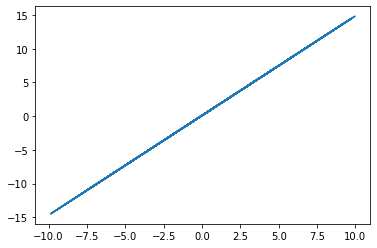

In [11]:
plt.plot(data[:,0], data[:,1])

calculate error

In [12]:
# b: bias 
# w: weights
def mse(b, w, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (w * x + b)) ** 2
    return totalError / float(len(points))

calculate gradient

In [13]:
# lr: learning rate
def step_grsdient(b, w, points, lr):
    b_gradient = 0
    w_gradient = 0 # The amount of samples
    M = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # The gradient of loss
        b_gradient += (2/M) * ((w * x + b) - y)
        w_gradient += (2/M) * x * ((w * x + b) - y)
    # update b and w
    new_b = b - lr*b_gradient
    new_w = w - lr*w_gradient
    
    return [new_b, new_w]